<a href="https://colab.research.google.com/github/MatheusSC017/Studies/blob/main/BinarySearchTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and Help Functions

In [1]:
from time import perf_counter
from random import randrange
from networkx.drawing.nx_pydot import graphviz_layout
import secrets
import networkx as nx
import matplotlib.pyplot as plt

def time_spent_decorator(function):
  def time_spent_calculation(*args, **kwargs):
    start = perf_counter()
    result = function(*args, **kwargs)
    end = perf_counter()
    total_time_spent = end - start
    return (result, total_time_spent)
  return time_spent_calculation

# Binary Tree With While

In [ ]:
class GFG:
  def __init__(self):
    self.bst = BST()

  def insert(self, value):
    self.bst.insert(value)
  
  def inorder(self):
    self.bst.inorder()
  
  def search(self, value):
    return self.bst.search(value)
  
  def delete(self, value):
    self.bst.delete(value)

class Node:
  left_node = None
  key = 0
  right_node = None

  def __init__(self, key):
    self.key = key

class BST:
  root = None

  def insert(self, value):
    node = Node(value)
    if self.root is None:
      self.root = node
      return
    prev = None
    temp = self.root
    while temp is not None:
      if temp.key < value:
        prev = temp
        temp = temp.right_node
      elif temp.key > value:
        prev = temp
        temp = temp.left_node
      else:
        return
    if prev.key < value:
      prev.right_node = node
    else:
      prev.left_node = node

  def inorder(self):
    temp = self.root
    stack = []
    while temp is not None or len(stack) != 0:
      if temp is not None:
        stack.append(temp)
        temp = temp.left_node
      else:
        temp = stack.pop()
        print(temp.key, end=" ")
        temp =  temp.right_node

  @time_spent_decorator
  def search(self, value):
    temp = self.root
    while temp:
      if temp.key == value:
        return temp
      elif temp.key < value:
        temp = temp.right_node
      else:
        temp = temp.left_node
    return temp
  
  def next_inorder_node(self, root):
    temp = root
    while temp.left_node is not None:
      temp = temp.left_node
    return temp.key

  def delete(self, value):
    prev = None
    node = None
    temp = self.root
    while temp:
      if temp.key < value:
        prev, node = temp, 'right_node'
        temp = temp.right_node

      elif temp.key > value:
        prev, node = temp, 'left_node'
        temp = temp.left_node
      
      else:
        if temp.right_node is None:
          setattr(prev, node, temp.left_node)
          return

        if temp.left_node is None:
          setattr(prev, node, temp.right_node)
          return

        next_node = self.next_inorder_node(temp.right_node) 
        if temp.key < next_node:
          prev, node = temp, 'right_node'
          temp = temp.right_node
        else:
          prev, node = temp, 'left_node'
          temp = temp.left_node
        value = next_node
        prev.key = next_node

In [ ]:
class ItemsList:
  def __init__(self):
    self.items = list()
  
  def append(self, value):
    if not self.search(value)[0]:
      self.items.append(value)
  
  @time_spent_decorator
  def search(self, value):
    for item in self.items:
      if item == value:
        return value
    return None

## Sorting a search tree

In [ ]:
tree = GFG()
tree.insert(50)
values = list({randrange(0, 100) for _ in range(20)})
for value in values:
  tree.insert(value)
print("Original list: ", values)
values.sort()
print("Ordered list: ", values)
print("Ordered Tree: ", end="")
tree.inorder()

Original list:  [32, 64, 34, 66, 73, 74, 41, 76, 15, 13, 78, 16, 50, 87, 23, 89, 29, 95]
Ordered list:  [13, 15, 16, 23, 29, 32, 34, 41, 50, 64, 66, 73, 74, 76, 78, 87, 89, 95]
Ordered Tree: 13 15 16 23 29 32 34 41 50 64 66 73 74 76 78 87 89 95 

## Deleting a node

In [ ]:
search_tree = GFG()
search_tree.insert(44)
search_tree.insert(17)
search_tree.insert(15)
search_tree.insert(32)
search_tree.insert(28)
search_tree.insert(33)
search_tree.insert(25)
search_tree.insert(30)
search_tree.insert(29)
search_tree.insert(88)
search_tree.insert(65)
search_tree.insert(97)
search_tree.insert(95)
search_tree.insert(99)
search_tree.insert(54)
search_tree.insert(82)
search_tree.insert(52)
search_tree.insert(63)
search_tree.insert(76)
search_tree.insert(86)
search_tree.insert(73)
search_tree.insert(80)
search_tree.insert(81)
search_tree.insert(78)
search_tree.insert(77)
search_tree.insert(79)

print("Inorder traversal of the given tree")
search_tree.inorder()
print("\nDelete")
search_tree.delete(76)
print("Inorder traversal of the modified tree")
search_tree.inorder()

Inorder traversal of the given tree
15 17 25 28 29 30 32 33 44 52 54 63 65 73 76 77 78 79 80 81 82 86 88 95 97 99 
Delete
Inorder traversal of the modified tree
15 17 25 28 29 30 32 33 44 52 54 63 65 73 77 78 79 80 81 82 86 88 95 97 99 

## Comparing running time

In [ ]:
search_tree = GFG()
list_of_items = ItemsList()
search_tree.insert(500)
list_of_items.append(500)

In [ ]:
values = set([randrange(0, 5000) for _ in range(200)])
for value in values:
  search_tree.insert(value)
  list_of_items.append(value)

In [ ]:
list_total_time = 0
tree_total_time = 0
for _ in range(200):
  value = randrange(0, 5000)
  response_list = list_of_items.search(value)
  response_tree = search_tree.search(value)
  if response_list[0] != getattr(response_tree[0], 'key', None):
    print(f'Error for value {value}: {response_list} != {response_tree}')
    break
  else:
    list_total_time += response_list[1]
    tree_total_time += response_tree[1]
print(tree_total_time / list_total_time)

0.3563779986005244


# Binary Tree With Recursion

In [13]:
class Node:
  left_node = None
  key = 0
  right_node = None

  def __init__(self, key):
    self.key = key

def insert(root, new_value):
  if root is None:
    return Node(new_value)
  else: 
    if root.key == new_value:
      return root
    elif root.key < new_value:
      root.right_node = insert(root.right_node, new_value)
    else:
      root.left_node = insert(root.left_node, new_value)
  return root

def search(root, value):
  if root is None or root.key == value:
    return root
  elif root.key < value:
    return search(root.right_node, value)
  else:
    return search(root.left_node, value)

def inorder(root):
  if root:
    yield from inorder(root.left_node)
    yield root.key
    yield from inorder(root.right_node)

def preorder(root):
  if root:
    yield root.key
    yield from preorder(root.left_node)
    yield from preorder(root.right_node)

def postorder(root):
  if root:
    yield from preorder(root.left_node)
    yield from preorder(root.right_node)
    yield root.key

def min(root):
  if root.left_node:
    return min(root.left_node)
  return root.key

def delete(root, value):
  if root is None:
    return root

  if root.key < value:
    root.right_node = delete(root.right_node, value)

  elif root.key > value:
    root.left_node = delete(root.left_node, value)

  else:
    if root.left_node is None:
      return root.right_node
    
    if root.right_node is None:
      return root.left_node

    inorder_value = min(root.right_node)
    root.key = inorder_value
    root.right_node = delete(root.right_node, inorder_value)

  return root

def print_tree(root):
  def print_node(root, prev=None, color=None):
    if root:
      G.add_node(root.key)
      if prev:
        G.add_edge(prev, root.key, color=color)
      print_node(root.left_node, root.key, '#00FF00')
      print_node(root.right_node, root.key, '#FF0000')
  G = nx.Graph()
  print_node(root)
  pos = graphviz_layout(G, prog='dot')
  colors = [G[u][v]['color'] for u,v in G.edges()]
  nx.draw(G, pos, with_labels=True, node_size=1000, edge_color=colors)
  plt.show()

## Sorting a search tree

In [12]:
search_tree = Node(44)
# values = list({randrange(0, 100) for _ in range(20)})
values = [17, 15, 32, 28, 33, 25, 30, 29, 88, 65, 97, 95, 99, 54, 82, 52, 
          63, 76, 86, 73, 80, 81, 78, 77, 79]
for value in values:
  insert(search_tree, value)
new_values = [50, ]
new_values.extend(values)
inorder_tree = list(inorder(search_tree))
print("Original list: ", new_values)
print("Ordered list: ", sorted(new_values))
print("Ordered Tree: ", inorder_tree)

Original list:  [50, 17, 15, 32, 28, 33, 25, 30, 29, 88, 65, 97, 95, 99, 54, 82, 52, 63, 76, 86, 73, 80, 81, 78, 77, 79]
Ordered list:  [15, 17, 25, 28, 29, 30, 32, 33, 50, 52, 54, 63, 65, 73, 76, 77, 78, 79, 80, 81, 82, 86, 88, 95, 97, 99]
Ordered Tree:  [15, 17, 25, 28, 29, 30, 32, 33, 44, 52, 54, 63, 65, 73, 76, 77, 78, 79, 80, 81, 82, 86, 88, 95, 97, 99]


In [15]:
preorder_tree = list(preorder(search_tree))
print("Original list: ", new_values)
print("Ordered Tree: ", preorder_tree)

Original list:  [50, 17, 15, 32, 28, 33, 25, 30, 29, 88, 65, 97, 95, 99, 54, 82, 52, 63, 76, 86, 73, 80, 81, 78, 77, 79]
Ordered Tree:  [44, 17, 15, 32, 28, 25, 30, 29, 33, 88, 65, 54, 52, 63, 82, 76, 73, 80, 78, 77, 79, 81, 86, 97, 95, 99]


In [14]:
postorder_tree = list(postorder(search_tree))
print("Original list: ", new_values)
print("Ordered Tree: ", postorder_tree)

Original list:  [50, 17, 15, 32, 28, 33, 25, 30, 29, 88, 65, 97, 95, 99, 54, 82, 52, 63, 76, 86, 73, 80, 81, 78, 77, 79]
Ordered Tree:  [17, 15, 32, 28, 25, 30, 29, 33, 88, 65, 54, 52, 63, 82, 76, 73, 80, 78, 77, 79, 81, 86, 97, 95, 99, 44]


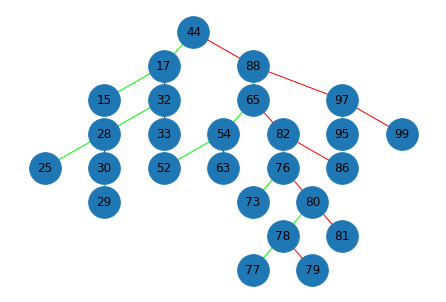

In [16]:
print_tree(search_tree)

## Deleting a node

Inorder traversal of the given tree
5 6 7 10 12 13 15 18 22 

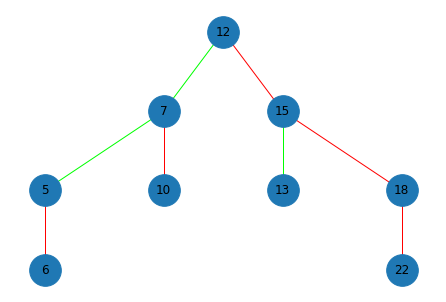


Delete
Inorder traversal of the modified tree
5 6 10 12 13 15 18 22 

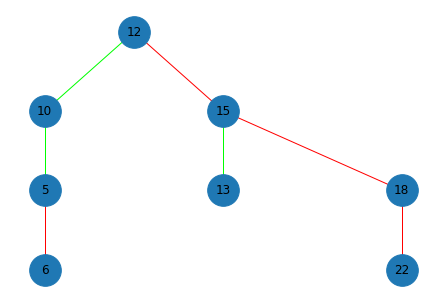

In [ ]:
search_tree = Node(12)
search_tree = insert(search_tree, 15)
search_tree = insert(search_tree, 7)
search_tree = insert(search_tree, 12)
search_tree = insert(search_tree, 5)
search_tree = insert(search_tree, 18)
search_tree = insert(search_tree, 22)
search_tree = insert(search_tree, 6)
search_tree = insert(search_tree, 10)
search_tree = insert(search_tree, 13)

print("Inorder traversal of the given tree")
inorder(search_tree)
print_tree(search_tree)
print("\nDelete")
search_tree = delete(search_tree, 7)
print("Inorder traversal of the modified tree")
inorder(search_tree)
print_tree(search_tree)

## Comparing running time

In [ ]:
search_tree = Node(12)
list_of_items = ItemsList()
list_of_items.append(12)

In [ ]:
values = set([randrange(-5000, 5000) for _ in range(500)])
for value in values:
  search_tree = insert(search_tree, value)
  list_of_items.append(value)

In [ ]:
list_total_time = 0
tree_total_time = 0
for _ in range(100):
  value = randrange(-1000, 1000)
  response_list = list_of_items.search(value)
  response_tree = time_spent_decorator(search)(search_tree, value)
  if response_list[0] != getattr(response_tree[0], 'key', None):
    print(f'Error for value {value}: {response_list} != {response_tree}')
    break
  else:
    list_total_time += response_list[1]
    tree_total_time += response_tree[1]
print(tree_total_time / list_total_time)

0.6621925763651164
